This notebook covers:
- SparkSession fundamentals  
- SparkContext  
- Spark engine concepts  
- RDD creation  
- Transformations vs actions  
- Lazy evaluation  
- Narrow vs wide dependencies  
- Hands-on examples  
📌 This notebook is part of my "PySpark Series: Beginner to Expert".

Medium blog: 

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName("TestApp").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/25 20:49:44 WARN Utils: Your hostname, bhuvaneshwaran-Latitude-5420, resolves to a loopback address: 127.0.1.1; using 192.168.1.17 instead (on interface wlp0s20f3)
25/11/25 20:49:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/25 20:49:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

## ✔ What each line means:
**from pyspark.sql import SparkSession**

Imports the main entry point for PySpark DataFrame API.

**SparkSession.builder**

Starts the configuration builder.
Think of it as filling a form before Spark starts.

**.appName("TestApp")**

Names your application.

Why name?

Shows up in Spark UI

Helps monitor jobs

Helps in cluster logs

**.getOrCreate()**

This is important.

If Spark is not running → create it

If SparkSession already exists → return existing one

This avoids multiple Spark sessions (which can crash JVM).

# ✔ Increase memory

.config("spark.executor.memory", "4g")

.config("spark.driver.memory", "2g")


# ✔ Enable Arrow for faster Pandas conversions

.config("spark.sql.execution.arrow.enabled", "true")

# ✔ Complete example:

In [4]:
spark = (
    SparkSession.builder
    .appName("MySparkApp")
    .master("local[*]")
    .config("spark.executor.memory", "4g")
    .config("spark.sql.execution.arrow.enabled", "true")
    .getOrCreate()
)

25/11/25 20:49:48 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
25/11/25 20:49:48 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [5]:
spark

# 🔥 What Is SparkContext?

* SparkContext = the “engine operator”.

* Manages the connection to the cluster

* Transfers tasks to executors

* Keeps track of job status

* Handles scheduling

You can access it through:

In [6]:
spark.sparkContext

<SparkContext master=local[*] appName=TestApp>

In [7]:
sc = spark.sparkContext
print(sc.appName)
print(sc.master)

TestApp
local[*]


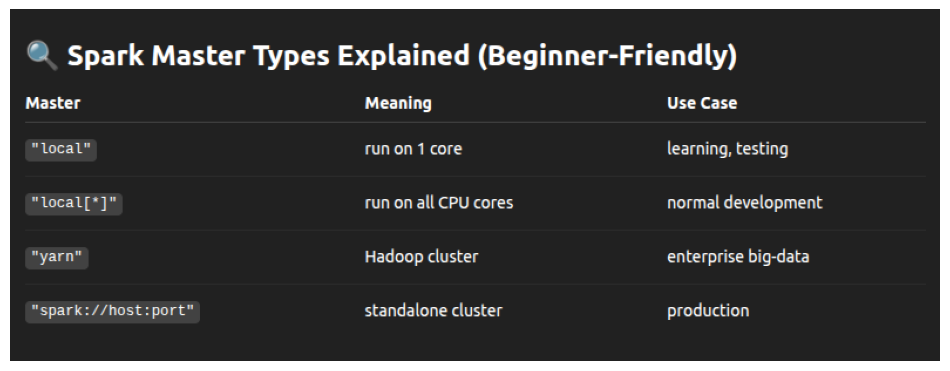

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("Spark_Master_Types.png")

# Show image
plt.figure(figsize=(12, 6)) 
plt.imshow(img)
plt.axis("off")
plt.show()

# 📂 Reading Data with Spark (From Your Notebooks)

In [9]:
df = spark.read.csv(r"/home/bhuvaneshwaran/Desktop/Medium/csvFiles/Employee.csv", header=True, inferSchema=True)

25/11/25 20:49:50 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


### ✔ Explanation of each parameter:
🏷 header=True

Use the first row as column names
Without header → Spark names columns _c0, _c1, _c2...

📐 inferSchema=True

Spark automatically detects data types:

1. integers

2. strings

3. floats

4. timestamps

If False, all columns become string.

### ❗ Should you always use inferSchema?

No.

For production → define schema manually.

## ✔ Alternatives to CSV
* spark.read.json()

* spark.read.parquet()

* spark.read.orc()

* spark.read.text()

* spark.read.jdbc()

**Parquet** is recommended for performance.


## 🛑 Stopping Spark Session

In [10]:
spark.stop()

Good practice because:

* Releases memory

* Stops JVM backend

* Avoids “multiple SparkContext” errors

🎯 Summary of What We Covered

* What SparkSession is

* Why it’s the entry point

* How .builder works

* Why appName, master, configs matter

* What SparkContext does

* How clusters are chosen

* Reading CSV with real examples

* Explanation of every parameter

* Best practices + alternatives

This is an excellent foundation.

In [11]:
spark.stop()

## 🔥 Creating RDDs in PySpark
✔ Method 1: parallelize (convert Python list → RDD)

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApp") \
    .master("local[*]") \
    .getOrCreate()

In [13]:
sc = spark.sparkContext

In [14]:
data = [1, 2, 3, 4, 5]

In [15]:
rdd = sc.parallelize([1,2,3,4,5])

When to use:

* For testing

* Small manual data

✔ Method 2: Load from external files

In [16]:
rdd = sc.textFile(r"/home/bhuvaneshwaran/Desktop/Medium/txtFiles/simple.txt")

In [17]:
print(rdd)

/home/bhuvaneshwaran/Desktop/Medium/txtFiles/simple.txt MapPartitionsRDD[2] at textFile at NativeMethodAccessorImpl.java:0


### When to use:

* Large dataset

* Streaming pipelines

* Log processing

## ⚡ Transformations vs Actions (Core Spark Concept)

RDD operations are split into two types:

## 🔵 Transformations:

These define the computation

**(MAP, FILTER, FLATMAP, REDUCEBYKEY)**

But they don’t run immediately.

Examples:

In [18]:
rdd.map(lambda x: x*2)
rdd.filter(lambda x: x > 10)

PythonRDD[3] at RDD at PythonRDD.scala:56

These are lazy — Spark waits until it sees an action.

## 🔴 Actions:

These trigger the computation
They tell Spark: “Okay, now give me the result.”

In [19]:
rdd.collect()

['Lorem ipsum dolor sit amet, consectetur adipiscing elit. ',
 'Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.',
 '',
 'This sample TXT file is provided by Sample-Files.com. Visit us for more sample files and resources.',
 'Skip to Content',
 'Generative AI',
 'Home',
 'Services',
 'Everyone can code! ✨',
 'Courses',
 'The AGI Book 📗',
 'Newsletter',
 'About',
 'Login',
 'Stay ahead of the curve with our Newsletter!',
 '',
 '',
 '',
 'Aleph Alpha',
 'European AI Platform',
 'Sovereign AI solutions',
 'Cursor',
 'AI Code Editor',
 'Code faster with AI',
 'Want to become a Verified Premium Tool for 2025/26 by us?',
 'Click here. Only 5 slots left.',
 'Google Gemini',
 'Multimodal AI Suite',
 'Think, create, connect',
 'Our Verified Premium Tools 2025/2026',
 '',
 'Join the Updated Course on Building with AI in 2025〰️Join the Updated Course on Building with AI in 2025',
 'Join the Updated Course on Building with AI in 2025 〰️',
 'Learn how to build any software with AI

In [20]:
rdd.take(5)

['Lorem ipsum dolor sit amet, consectetur adipiscing elit. ',
 'Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.',
 '',
 'This sample TXT file is provided by Sample-Files.com. Visit us for more sample files and resources.',
 'Skip to Content']

In [21]:
rdd.count()

704

## 🧠 Understanding Lazy Evaluation (Beginner-Friendly Story)

Imagine writing steps:

* wash vegetables

* cut vegetables

* cook vegetables

But you start only when someone says:

**“Serve the food!”**

That's how **Spark** works.

You tell Spark the steps (transformations).
Spark waits.
When an action arrives → it runs the entire chain.

Result:

* Optimized execution

* Better performance

* Fewer unnecessary operations

## 🔥 Real Example: Transformations + Action

In [22]:
rdd = sc.parallelize([1, 2, 3, 4, 5])

transformed = rdd \
    .filter(lambda x: x % 2 == 0) \
    .map(lambda x: x * 10)

result = transformed.collect()

print(result)


[20, 40]


### Explanation:

**filter** → keep even numbers

**map** → multiply by 10

**collect** → triggers execution

## 🌉 Narrow vs Wide Transformations

This is SUPER important for performance.

## 🔵 Narrow Transformation

Data stays on the same partition:

Examples:

* map

* filter

* flatMap

Fast because NO SHUFFLE.

## 🔴 Wide Transformation

Data needs to move across partitions → SHUFFLE

Examples:

* reduceByKey

* groupBy

* join

This is expensive and slow.

✔ Example:

In [28]:
rdd.reduceByKey(lambda a,b: a+b)

PythonRDD[12] at RDD at PythonRDD.scala:56

This requires grouping keys → shuffle → slower.

## 💡 RDD Alternatives
✔ Modern alternative → DataFrames

Why better?

* Catalyst optimizer

* Columnar processing

* Faster execution

* Easier syntax

Example:

    df.filter(df.age > 30)


## ✔ Pandas API on Spark (pandas-on-spark)

Best for pandas users transitioning.

| Mistake                        | Why wrong             |
| ------------------------------ | --------------------- |
| Using `collect()` on huge data | Causes memory crash   |
| Too many wide transformations  | Slow jobs             |
| Creating many small partitions | Overhead              |
| Using RDD everywhere           | DataFrames are faster |
